In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os

In [3]:
buoy = pd.read_csv("/Users/matthewq/Geol_599/week9/Waves_2023.txt", sep='\s+') 
buoy.describe()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,17285.0,17285.000000,17285.000000,17285.000000,17285.000000,17285.0,17285.0,17285.0,17285.000000,17285.000000,17285.000000,17285.000000,17285.0,17285.0,17285.000000,17285.0,17285.0,17285.0
mean,2023.0,6.526063,15.800579,11.499277,40.985594,999.0,99.0,99.0,1.083535,12.161879,6.813054,234.556205,9999.0,999.0,17.196535,999.0,99.0,99.0
std,0.0,3.467253,8.817920,6.925343,15.007646,0.0,0.0,0.0,2.296129,4.165737,2.803208,49.429981,0.0,0.0,2.564664,0.0,0.0,0.0
min,2023.0,1.000000,1.000000,0.000000,0.000000,999.0,99.0,99.0,0.330000,2.860000,3.420000,10.000000,9999.0,999.0,11.800000,999.0,99.0,99.0
25%,2023.0,4.000000,8.000000,5.000000,26.000000,999.0,99.0,99.0,0.730000,9.090000,5.500000,179.000000,9999.0,999.0,14.600000,999.0,99.0,99.0
50%,2023.0,6.000000,16.000000,11.000000,26.000000,999.0,99.0,99.0,0.880000,12.500000,6.360000,263.000000,9999.0,999.0,17.500000,999.0,99.0,99.0
75%,2023.0,10.000000,23.000000,18.000000,56.000000,999.0,99.0,99.0,1.140000,14.290000,7.550000,271.000000,9999.0,999.0,19.400000,999.0,99.0,99.0
max,2023.0,12.000000,31.000000,23.000000,56.000000,999.0,99.0,99.0,99.000000,99.000000,99.000000,999.000000,9999.0,999.0,23.900000,999.0,99.0,99.0


In [4]:
buoy_use = buoy[['WVHT', 'DPD', 'APD', 'MWD', 'WTMP']].copy()
buoy_use.describe()

,WVHT,DPD,APD,MWD,WTMP
count,17285.000000,17285.000000,17285.000000,17285.000000,17285.000000
mean,1.083535,12.161879,6.813054,234.556205,17.196535
std,2.296129,4.165737,2.803208,49.429981,2.564664
min,0.330000,2.860000,3.420000,10.000000,11.800000
25%,0.730000,9.090000,5.500000,179.000000,14.600000
50%,0.880000,12.500000,6.360000,263.000000,17.500000
75%,1.140000,14.290000,7.550000,271.000000,19.400000
max,99.000000,99.000000,99.000000,999.000000,23.900000


In [5]:
buoy_use.isna().sum() #check for any NA values

WVHT    0
DPD     0
APD     0
MWD     0
WTMP    0
dtype: int64

In [6]:
buoy_use_na = buoy_use.replace(99,np.NaN) #convert any 99 values to NaN

In [7]:
buoy_use_na = buoy_use_na.replace(999,np.NaN) #convert any 999 values to NaN

In [8]:
buoy_use_na.isna().sum() #check for any NA values

WVHT    9
DPD     9
APD     9
MWD     9
WTMP    0
dtype: int64

In [27]:
buoy_use_nona = buoy_use_na.dropna() #drop any NaN values, which now contains 99 and 999 values
buoy_use_nona.describe()

,WVHT,DPD,APD,MWD,WTMP
count,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000
mean,1.032525,12.116640,6.765029,234.157965,17.195294
std,0.526637,3.664928,1.852623,46.260000,2.564729
min,0.330000,2.860000,3.420000,10.000000,11.800000
25%,0.730000,9.090000,5.500000,179.000000,14.600000
50%,0.880000,12.500000,6.360000,263.000000,17.500000
75%,1.140000,14.290000,7.550000,271.000000,19.400000
max,5.130000,25.000000,15.790000,306.000000,23.900000


In [57]:
pca = PCA(n_components=5) #PCA with 5 components because dataset we are using has 5 variables
pca.fit(buoy_use_nona)

PCA(n_components=5)

In [40]:
plotData = pca.transform(buoy_use_nona) #transforms data onto your different principal components

In [41]:
componentsDf = pd.DataFrame(data = plotData, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']) #converts plotData into a dataframe with colums labeled for each PC

<Axes: xlabel='PC1', ylabel='PC2'>

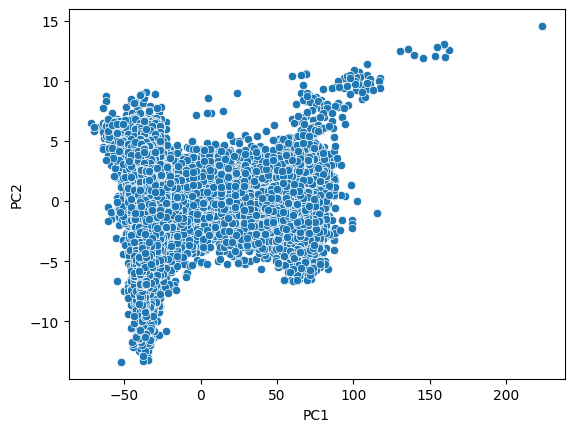

In [44]:
#1- 
sns.scatterplot(data=buoy_componentsDf, x="PC1", y="PC2")

In [42]:
buoy_compdf = pd.concat([buoy_use_nona.reset_index(drop=True),componentsDf.reset_index(drop=True)], axis=1) #combines the buoy dataframe with the PCA transformed buoy data frame for plotting purposes
buoy_compdf.describe()

,WVHT,DPD,APD,MWD,WTMP,PC1,PC2,PC3,PC4,PC5
count,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,1.727600e+04,1.727600e+04,1.727600e+04,1.727600e+04,1.727600e+04
mean,1.032525,12.116640,6.765029,234.157965,17.195294,6.738558e-15,-5.001273e-16,1.592511e-15,-1.381931e-16,1.480640e-16
std,0.526637,3.664928,1.852623,46.260000,2.564729,4.630067e+01,3.503085e+00,2.320603e+00,1.451069e+00,4.385680e-01
min,0.330000,2.860000,3.420000,10.000000,11.800000,-7.191860e+01,-1.336884e+01,-7.034258e+00,-4.995118e+00,-1.138198e+00
25%,0.730000,9.090000,5.500000,179.000000,14.600000,-3.691871e+01,-2.166851e+00,-1.668798e+00,-9.233843e-01,-2.591649e-01
50%,0.880000,12.500000,6.360000,263.000000,17.500000,-2.895237e+01,3.652280e-02,-1.121978e-01,-4.288627e-02,-5.959029e-02
75%,1.140000,14.290000,7.550000,271.000000,19.400000,5.529869e+01,2.519556e+00,1.699674e+00,7.731556e-01,1.551130e-01
max,5.130000,25.000000,15.790000,306.000000,23.900000,2.237523e+02,1.456240e+01,8.608666e+00,6.521354e+00,3.656688e+00


<Axes: xlabel='PC1', ylabel='PC2'>

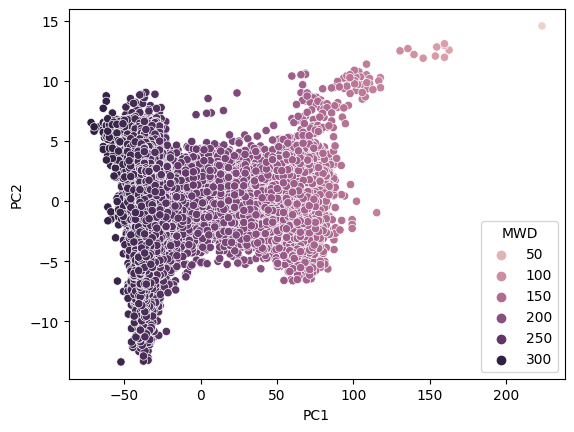

In [20]:
sns.scatterplot(data=buoy_compdf, x="PC1", y="PC2", hue = 'MWD')

<Axes: xlabel='PC1', ylabel='PC2'>

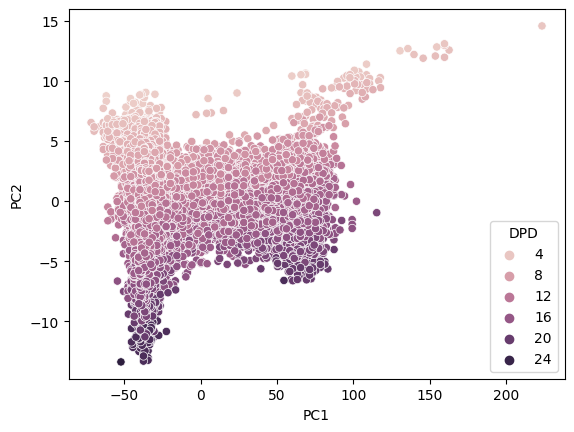

In [21]:
sns.scatterplot(data=buoy_compdf, x="PC1", y="PC2", hue = 'DPD')

In [37]:
print(pca.explained_variance_ratio_)
#2- Principal component one captures 99.1% of the variance in the dataset, so only one PC is needed to capture most of the variability in the dataset.

[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04]


In [38]:
print(np.abs(pca.components_))
#3- MWD (Mean Wave Direction) contributes the most to PC1 (0.999), which explains 99.1% of the total variability. 
#DPD (Dominance Wave Period), contributes the most to PC2 (0.923) which only explains 0.6% of the total variability.

[[0.00414966 0.03483275 0.00632252 0.99911854 0.02217264]
 [0.02817253 0.92292703 0.35324348 0.02653793 0.14807698]
 [0.03730158 0.14552072 0.03477188 0.02692689 0.98767311]
 [0.12786551 0.35382026 0.92602029 0.01817485 0.02485407]]


#4- As the PCA reduced almost all of variability in the data set to only one principal component, the dimentionality reduction performed weill.  This means that only one of the 5 variables of interest, MWD, controls nearly all of the variability in the dataset. 

In [30]:
#extra
os.chdir('/Users/matthewq/Geol_599/week11') #MWD of 10 seems like an outlier, going to visually inspect data
buoy_use_nona.to_csv('buoy_use_nona.csv', index=False)

In [55]:
buoy_use_nona_100 = pd.read_csv("/Users/matthewq/Geol_599/week11/buoy_use_nona_100.csv") #removed any MWD <100 and reloading data (only 10 data points)
buoy_use_nona_100.describe()

,WVHT,DPD,APD,MWD,WTMP
count,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000
mean,1.032478,12.121168,6.766477,234.250608,17.194000
std,0.526740,3.661140,1.852170,46.109538,2.564886
min,0.330000,2.860000,3.420000,103.000000,11.800000
25%,0.730000,9.090000,5.500000,179.000000,14.600000
50%,0.880000,12.500000,6.360000,263.000000,17.500000
75%,1.140000,14.290000,7.550000,271.000000,19.400000
max,5.130000,25.000000,15.790000,306.000000,23.900000


In [58]:
pca.fit(buoy_use_nona_100)
print(pca.explained_variance_ratio_) #didnt affect data variability much, PC1 still contains 99.2% of variability

[9.90762658e-01 5.66793973e-03 2.50328656e-03 9.76697291e-04
 8.94188802e-05]


In [35]:
print(np.abs(pca.components_))
#removing MWD values <100 had no significant impact on variables impact on PC1

[[0.00418155 0.03542211 0.00625865 0.99909678 0.02223168]
 [0.0289577  0.92148079 0.35541708 0.02694896 0.15161485]
 [0.03673726 0.14813207 0.03799235 0.02713421 0.98718163]
 [0.12732943 0.35647435 0.92511494 0.01845186 0.02313294]
 [0.99074798 0.02452269 0.12790019 0.0016269  0.03815726]]


<Axes: xlabel='PC1', ylabel='PC2'>

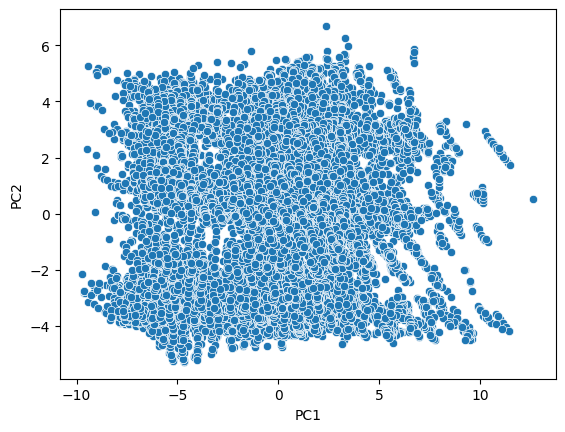

In [59]:
sns.scatterplot(data=noMWD_comp, x="PC1", y="PC2")

In [45]:
buoy_noMWD = buoy_use_nona[['WVHT', 'DPD', 'APD', 'WTMP']].copy() #removing MWD completely
buoy_noMWD.describe()

,WVHT,DPD,APD,WTMP
count,17276.000000,17276.000000,17276.000000,17276.000000
mean,1.032525,12.116640,6.765029,17.195294
std,0.526637,3.664928,1.852623,2.564729
min,0.330000,2.860000,3.420000,11.800000
25%,0.730000,9.090000,5.500000,14.600000
50%,0.880000,12.500000,6.360000,17.500000
75%,1.140000,14.290000,7.550000,19.400000
max,5.130000,25.000000,15.790000,23.900000


In [60]:
pca = PCA(n_components=4) 
pca.fit(buoy_noMWD)
print(pca.explained_variance_ratio_) 

[0.59999217 0.28538812 0.10638475 0.00823496]


In [61]:
print(np.abs(pca.components_))

[[0.00265783 0.96536372 0.25148377 0.06943871]
 [0.07832069 0.01129328 0.22558638 0.97100418]
 [0.13367143 0.25807796 0.93026634 0.22390234]
 [0.98792244 0.03662122 0.14307774 0.04687102]]


<Axes: xlabel='PC1', ylabel='PC2'>

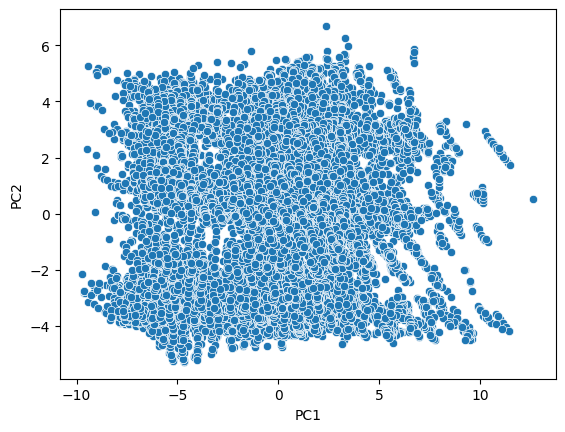

In [62]:
noMWD_plotData = pca.transform(buoy_noMWD)
noMWD_comp = pd.DataFrame(data = noMWD_plotData, columns = ['PC1', 'PC2', 'PC3', 'PC4']) 
sns.scatterplot(data=noMWD_comp, x="PC1", y="PC2")

<Axes: xlabel='PC1', ylabel='PC2'>

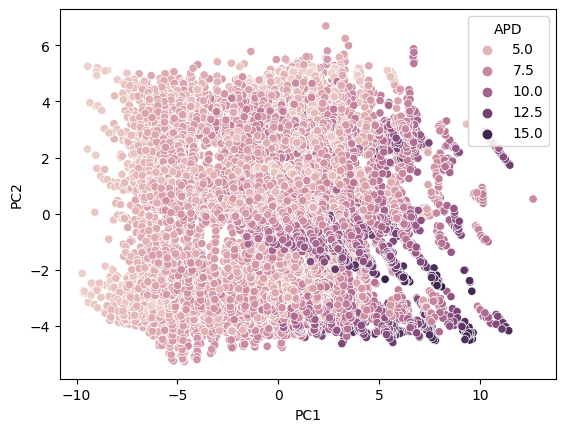

In [63]:
buoy_compdf_noMWD = pd.concat([buoy_noMWD.reset_index(drop=True),noMWD_comp.reset_index(drop=True)], axis=1) 
sns.scatterplot(data=buoy_compdf_noMWD, x="PC1", y="PC2", hue = 'APD')